1. Read the column description and ensure you understand each attribute well

In [61]:
# Import Packages
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing as LE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

2. Study the data distribution in each attribute, share your findings. (10 points)

In [62]:
BPLM_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [63]:
BPLM_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [64]:
BPLM_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [65]:
BPLM_df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [66]:
BPLM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [67]:
BPLM_df.shape

(5000, 14)

In [68]:
BPLM_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


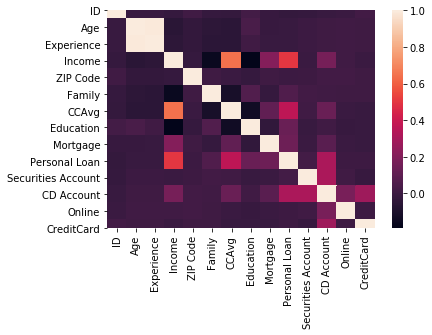

In [69]:
sns.heatmap(BPLM_df.corr())

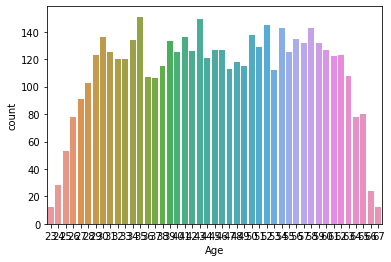

In [70]:
sns.countplot(data = BPLM_df, x="Age")

Attribute "Age"
Distribution is Normal. 
Min age is 23 and Max 67 with a mean of 45 years

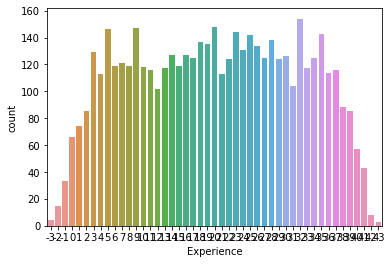

In [71]:
sns.countplot(data = BPLM_df, x="Experience")

Attribute "Experience" Distribution is Normal. There are some errors in data as Experience cannot be in negative values. The standard deviation is high due to the error in data.  

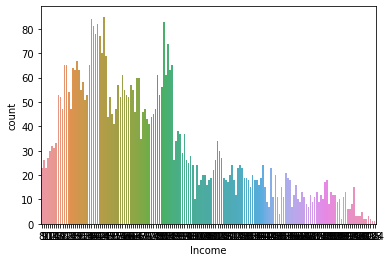

In [72]:
sns.countplot(data = BPLM_df, x="Income")

Attribute "Income" Distribution is right skewed. Has a few outliers as income beyond 60 yrs old declines drastically. 

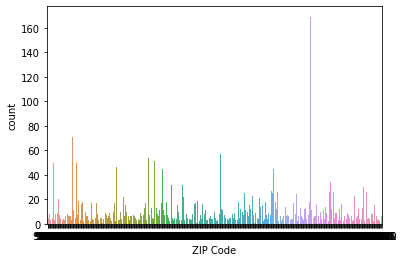

In [115]:
sns.countplot(data = BPLM_df, x="ZIP Code")

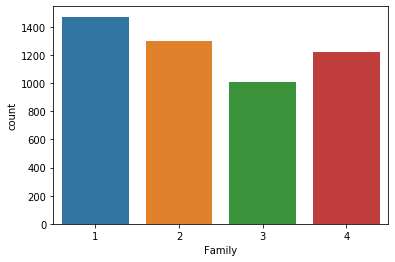

In [116]:
sns.countplot(data = BPLM_df, x="Family")

Attribute "Family" Distribution is slightly right skewed, close to normal. 

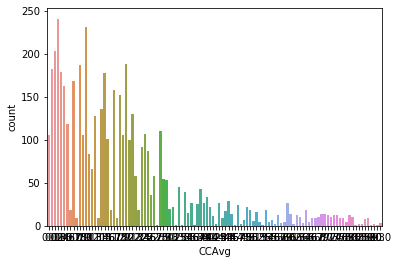

In [74]:
sns.countplot(data = BPLM_df, x="CCAvg")

Attribute "CCAvg" Distribution is left skewed. Distribution is not normal. 

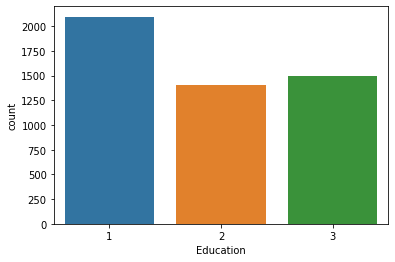

In [75]:
sns.countplot(data = BPLM_df, x="Education")

Attribute "Education" has a normal distribution 

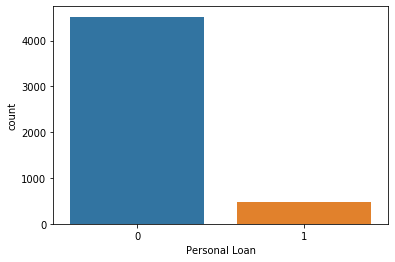

In [77]:
sns.countplot(data = BPLM_df, x="Personal Loan") ## Target Column

Attribute "Personal Loan" is the Target Column. Data is skewed. Distribution is not normal. 

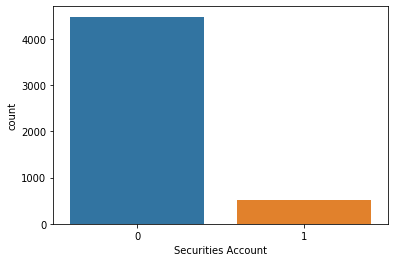

In [78]:
sns.countplot(data = BPLM_df, x="Securities Account") 

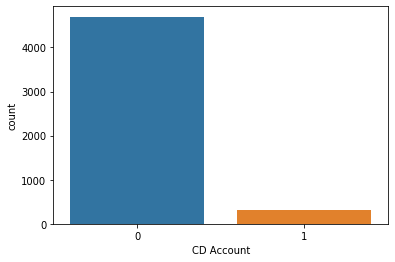

In [79]:
sns.countplot(data = BPLM_df, x="CD Account") 

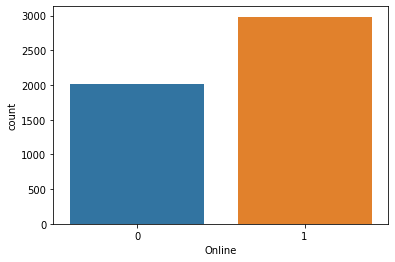

In [80]:
sns.countplot(data = BPLM_df, x="Online") 

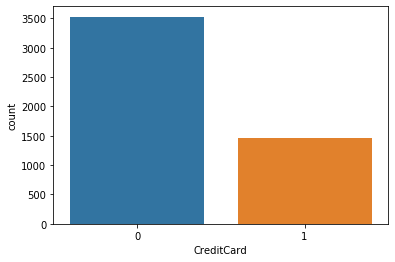

In [81]:
sns.countplot(data = BPLM_df, x="CreditCard") 

3. Get the target column distribution. 

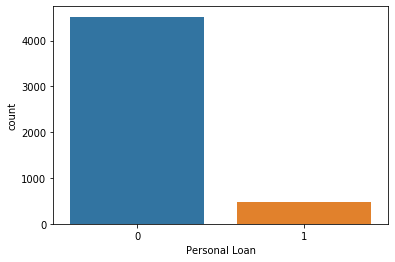

In [83]:
sns.countplot(data = BPLM_df, x="Personal Loan")

## The Personal Loan column is the target column which is right skewed as only 9.6% (480 customers) of the entire population has opted for persoanl loans. 

## Data Processing steps-
Step 1 - Identify all relevent attributes and drop irrelevent attributes 
        Drop - ID, Zip Code 
Step 2 - Identify all negative values against the attributes and convert to positive
        Exerience column has negative values which can be a typo error. Hence multiplying with -1 will convert it to positive values
Step 3 - delete rows where all relevent attributes are 0 

Move to split for test and training 


In [84]:
##Step 1 - Identify all relevent attributes and drop irrelevent attributes - Drop - ID, Zip Code 
bplm_df=BPLM_df.drop(['ID', 'ZIP Code'], axis =1)

In [85]:
bplm_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [86]:
##Step 2 - Identify all negative values against the attributes and convert to positive
##Exerience column has negative values which can be a typo error. Hence multiplying with -1 will convert it to positive values
bplm_df['Experience'] = np.where(bplm_df['Experience'] < 0 , bplm_df['Experience']*-1,bplm_df['Experience'])

In [87]:
## Delete Rows where 'Mortgage',"CCAvg",'Personal Loan','Securities Account','CD Account','Online','CreditCard' = 0.
bplm_df['Experience'].min()

0

In [88]:
(bplm_df[['Mortgage',"CCAvg",'Personal Loan','Securities Account','CD Account','Online','CreditCard']] == 0 ).index

RangeIndex(start=0, stop=5000, step=1)

In [89]:
##df_new = df.drop(df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index)
bplm_df_new = bplm_df.drop(bplm_df[(bplm_df['Mortgage']==0) & \
                                   (bplm_df["CCAvg"]==0) &  \
                                   (bplm_df["Personal Loan"]==0) & \
                                   (bplm_df["Securities Account"]==0) & \
                                   (bplm_df["CD Account"]==0) & \
                                   (bplm_df["Online"]==0) &\
                                 (bplm_df["CreditCard"]==0) ].index)

In [90]:
bplm_df_new.shape

(4980, 12)

4. Split the data into training and test set in the ratio of 70:30 respectively

In [91]:
x = bplm_df_new.drop ("Personal Loan", axis = 1)
y = bplm_df_new["Personal Loan"]
print (x.head())
print (y.head())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)

## KNN

In [92]:
sc=StandardScaler()
sc.fit(x_train)
scaledx_train = sc.transform(x_train)
scaledx_test = sc.transform(x_test)
scaledx_train

array([[ 0.73913648,  0.67264866, -0.55826509, ..., -0.25254276,
         0.81874306, -0.64670411],
       [-1.6090258 , -1.50909723,  2.71834237, ..., -0.25254276,
         0.81874306, -0.64670411],
       [-0.04358428,  0.06175981,  1.26207239, ...,  3.95972547,
         0.81874306,  1.54630223],
       ...,
       [ 1.60882622,  1.71988668, -1.26498434, ..., -0.25254276,
         0.81874306,  1.54630223],
       [-1.34811888, -1.24728773, -1.30781581, ..., -0.25254276,
         0.81874306, -0.64670411],
       [-0.21752223, -0.2000497 ,  0.31978005, ..., -0.25254276,
         0.81874306,  1.54630223]])

In [93]:
neighbors = np.arange(1, 20, 2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledx_train,y_train)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledx_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledx_test,y_test)
    print("K=", k)
    print("Test Accuracy = ",test_accuracy_plot[i])
    print("Train Accuracy = ",train_accuracy_plot[i])

K= 1
Test Accuracy =  0.9605087014725568
Train Accuracy =  1.0
K= 3
Test Accuracy =  0.9672021419009371
Train Accuracy =  0.9770510613884108
K= 5
Test Accuracy =  0.9591700133868809
Train Accuracy =  0.9695926563396443
K= 7
Test Accuracy =  0.9571619812583668
Train Accuracy =  0.9652897303499713
K= 9
Test Accuracy =  0.9551539491298527
Train Accuracy =  0.9601262191623637
K= 11
Test Accuracy =  0.9524765729585006
Train Accuracy =  0.9558232931726908
K= 13
Test Accuracy =  0.9524765729585006
Train Accuracy =  0.9538152610441767
K= 15
Test Accuracy =  0.9511378848728246
Train Accuracy =  0.9506597819850832
K= 17
Test Accuracy =  0.9504685408299867
Train Accuracy =  0.9483648881239243
K= 19
Test Accuracy =  0.9471218206157965
Train Accuracy =  0.9469305794606999


In [94]:
knn3=KNeighborsClassifier(n_neighbors=3)
scaledx_test = sc.transform(x_test)
knn3.fit(scaledx_train,y_train)
print("What is the Testing Accuracy")
print(knn3.score(scaledx_test,y_test))
print("What is the Training Accuracy")
print(knn3.score(scaledx_train,y_train))

What is the Testing Accuracy
0.9672021419009371
What is the Training Accuracy
0.9770510613884108


## Conclusion on KNN 
K= 3
Test Accuracy =  0.9672021419009371
Train Accuracy =  0.9770510613884108

In [95]:
classifier1 = KNeighborsClassifier(n_neighbors=3)  
classifier1.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)

In [96]:
print(confusion_matrix(y_test, y_pred))  

[[1300   63]
 [  76   55]]


In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  

In [98]:
print(classification_report(y_test, y_pred))  
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1363
           1       0.47      0.42      0.44       131

    accuracy                           0.91      1494
   macro avg       0.71      0.69      0.70      1494
weighted avg       0.90      0.91      0.90      1494

0.9069611780455153


## KNN with the K value 3 has an overall prediction accuracy of 91% with a recall value of 95%

## Logistic Regression

In [99]:
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
type(x_train)


pandas.core.frame.DataFrame

In [100]:
x_train.shape

(3486, 11)

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score 

In [102]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
model_score_f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print('model_score: {}'.format(model_score))
print('f1 score : {}'.format(model_score_f1))
print('accuracy : {}'.format(accuracy))

model_score: 0.9558232931726908
f1 score : 0.7130434782608696
accuracy : 0.9558232931726908


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
print(confusion_matrix(y_test, y_predict))  

[[1346   17]
 [  49   82]]


In [104]:
print(classification_report(y_test, y_predict))  
print(accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1363
           1       0.83      0.63      0.71       131

    accuracy                           0.96      1494
   macro avg       0.90      0.81      0.84      1494
weighted avg       0.95      0.96      0.95      1494

0.9558232931726908


## Iteration 2

In [105]:
x_train_scaled = LE.scale(x_train)
x_test_scaled = LE.scale(x_test)

In [106]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
y_predict = model.predict(x_test_scaled)
model_score = model.score(x_test_scaled, y_test)
model_score_f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print('model_score: {}'.format(model_score))
print('f1 score : {}'.format(model_score_f1))
print('accuracy : {}'.format(accuracy))

model_score: 0.9578313253012049
f1 score : 0.749003984063745
accuracy : 0.9578313253012049


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
print(confusion_matrix(y_test, y_predict))  

[[1337   26]
 [  37   94]]


In [108]:
print(classification_report(y_test, y_predict))  
print(accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1363
           1       0.78      0.72      0.75       131

    accuracy                           0.96      1494
   macro avg       0.88      0.85      0.86      1494
weighted avg       0.96      0.96      0.96      1494

0.9578313253012049


## Conclusion on Logistic Regression 
## Iteration 1 & 2 - has an overall prediction accuracy of 96% with a recall value of 99% & 98% respectively

## NaiveBayes Model

In [109]:
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
type(x_train)


pandas.core.frame.DataFrame

In [110]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
# make predictions
expected = y_test
predicted = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1363
           1       0.41      0.56      0.48       131

    accuracy                           0.89      1494
   macro avg       0.68      0.74      0.71      1494
weighted avg       0.91      0.89      0.90      1494

[[1257  106]
 [  57   74]]


6. Print the confusion matrix for all the above models (10 points)

In [112]:
print(confusion_matrix(y_test, y_pred)) ## KNN

[[1300   63]
 [  76   55]]


In [113]:
print(confusion_matrix(y_test, y_predict))  ## Logistic Regression Iteration 

[[1337   26]
 [  37   94]]


In [114]:
print(metrics.confusion_matrix(expected, predicted)) ## NaiveBayes Model 

[[1257  106]
 [  57   74]]


7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)